## Error Correction

In [ ]:
!pip install qiskit
!pip install pylatexenc

## Three Qubit Bit Flip Code

### Bit-Flip Error Correction

Suppose we want to send some quantum information through some noisy information channel that flips the qubits with probability $p$. So, with probability $p$, the state $|\psi\rangle$ is sent to $X|\psi \rangle$, where $X$ is the Pauli-$X$ gate. To protect against bit flips we encode the state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ into three qubits as the state $\alpha|000\rangle + \beta|111\rangle$. This can be written as,

\begin{align}
|0\rangle \mapsto |0_L\rangle &= |000\rangle \\
|1\rangle \mapsto |1_L\rangle &= |111\rangle 
\end{align}

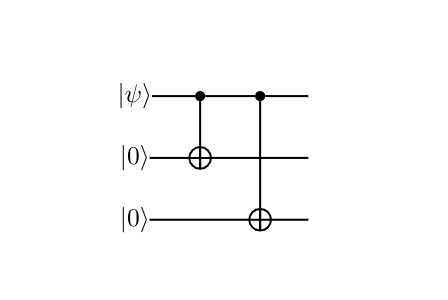

## Three Qubit Bit Flip Code

### Bit-Flip Error Correction

Suppose we want to send some quantum information through some noisy information channel that flips the qubits with probability $p$. So, with probability $p$, the state $|\psi\rangle$ is sent to $X|\psi \rangle$, where $X$ is the Pauli-$X$ gate. To protect against bit flips we encode the state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ into three qubits as the state $\alpha|000\rangle + \beta|111\rangle$. This can be written as,

\begin{align}
|0\rangle \mapsto |0_L\rangle &= |000\rangle \\
|1\rangle \mapsto |1_L\rangle &= |111\rangle 
\end{align}

Suppose now that we send each of the three qubits above through the noisy bit-flip channel after we have encoded the arbitrary state $|\psi\rangle$. Then each of the three qubits is flipped via the Pauli-$X$ gate with probability $p$. then we may *detect the arror*. There are four projection operators corresponding to four *error syndromes*:

\begin{align}
P_0 &= |000\rangle \langle 000| + |111\rangle \langle 111| \text{no error} \\
P_1 &= |100\rangle \langle 100| + |011\rangle \langle 011| \text{bit flip on first qubit} \\
P_2 &= |010\rangle \langle 010| + |101\rangle \langle 101| \text{bit flip on second qubit} \\
P_3 &= |001\rangle \langle 001| + |110\rangle \langle 110| \text{bit flip on third qubit}
\end{align}

So, if for example we have an error that occurs on the second qubit, then the corrupted state is $\alpha |010\rangle + \beta|101\rangle$. Computing $\langle \psi |P_2|\psi \rangle = 1$, we can see two things. First, the measurment using the projection operator $P_2$ does not effect the state. It is the same before and after the measurement. Second, the syndrome measurment contains only information about the kind of error that has occurred and not what the values of $\alpha$ and $\beta$ are. Let's look at a little Python code. 

In [ ]:
import numpy as np


# Define the spin-down single qubit basis state
d = np.matrix([[1],
               [0]])

# Define the spin-up single qubit basis state
u = np.matrix([[0],
               [1]])


# Define the two basis state summands of the corrupted state
dud = np.kron(d, np.kron(u, d))

udu = np.kron(u, np.kron(d, u))

print(dud)
print(udu)

[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [ ]:
# Define the projection operator corresponding to the corrupted state
P2 = dud*(dud.H) + udu*(udu.H)
print(P2)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


Take for example the initial state $|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ and encode it as the state $\frac{1}{\sqrt{2}}(|000\rangle - |111\rangle)$. The bit flip occurs on the second qubit so we have the corrupted state $\frac{1}{\sqrt{2}}(|010\rangle - |101\rangle)$. 

In [ ]:
# Define some corrupted state using complex coefficients a and b such that |a|^2+|b|^2 = 1
a = 1/np.sqrt(2)
b = -1/np.sqrt(2)
psi = a*(dud) + b*(udu)
print(psi)

[[ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]]


Now, we can measure using the projection operator $P_2$:

\begin{align}
\begin{pmatrix}
0, & 0, & 1/\sqrt{2}, & 0, & 0, & -1/\sqrt{2}, & 0, & 0
\end{pmatrix}
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
0 \\ 0 \\ 1/\sqrt{2} \\ 0 \\ 0 \\ -1/\sqrt{2} \\ 0 \\ 0
\end{pmatrix} = 1
\end{align}

In slightly different notation this can be written as,

\begin{align}
\frac{1}{\sqrt{2}}(\langle 010| - \langle 101|)
(|010\rangle \langle 010| + |101 \rangle \langle 101|)
\frac{1}{\sqrt{2}}(|010\rangle - |101\rangle)
\end{align}

In [ ]:
# Measure using the projection operator P2
(psi.H)*P2*(psi)

matrix([[1.]])

Let's perform measurements on the same corrupted state using the other projection operators to see what happens. In particular, we want to compute the values of 

\begin{align}
\langle \psi |P_0|\psi \rangle \\
\langle \psi |P_1|\psi \rangle \\
\langle \psi |P_3|\psi \rangle
\end{align}

where $|\psi \rangle = \frac{1}{\sqrt{2}}(|010\rangle - |101\rangle)$. First, let's define the three operators $P_0, P_1,$ and $P_3$. 

In [ ]:
# Define all of the basis states
ddd = np.kron(d, np.kron(d,d))
ddu = np.kron(d, np.kron(d,u))
dud = np.kron(d, np.kron(u,d))
udd = np.kron(u, np.kron(d,d))
uuu = np.kron(u, np.kron(u,u))
uud = np.kron(u, np.kron(u,d))
udu = np.kron(u, np.kron(d,u))
duu = np.kron(d, np.kron(u,u))

In [ ]:
# Define the P0 projection operator
P0 = ddd*(ddd.H) + uuu*(uuu.H)
print(P0)

[[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]]


In [ ]:
# Define the P1 projection operator
P1 = ddu*(ddu.H) + uud*(uud.H)
print(P1)

[[0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0]]


In [ ]:
# Define the P3 projection operator
P3 = udd*(udd.H) + duu*(duu.H)
print(P3)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [ ]:
# Measure using P0
(psi.H)*P0*(psi)

matrix([[0.]])

In [ ]:
# Measure using P2
(psi.H)*P1*(psi)

matrix([[0.]])

In [ ]:
# Measure using P3
(psi.H)*P3*(psi)

matrix([[0.]])

All of the measurements came out to be zero since the error did not occur in the first or third qubit. So, the syndrome measurements associated with the three different places where an error can occur return $1$ if the appropriate operator was applied, and $0$ otherwise. 

## Three Qubit Bit Flip Code

### Bit-Flip Error Correction

Suppose we want to send some quantum information through some noisy information channel that flips the qubits with probability $p$. So, with probability $p$, the state $|\psi\rangle$ is sent to $X|\psi \rangle$, where $X$ is the Pauli-$X$ gate. To protect against bit flips we encode the state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ into three qubits as the state $\alpha|000\rangle + \beta|111\rangle$. This can be written as,

\begin{align}
|0\rangle \mapsto |0_L\rangle &= |000\rangle \\
|1\rangle \mapsto |1_L\rangle &= |111\rangle 
\end{align}

Suppose now that we send each of the three qubits above through the noisy bit-flip channel after we have encoded the arbitrary state $|\psi\rangle$. Then each of the three qubits is flipped via the Pauli-$X$ gate with probability $p$. then we may *detect the arror*. There are four projection operators corresponding to four *error syndromes*:

\begin{align}
P_0 &= |000\rangle \langle 000| + |111\rangle \langle 111| \text{no error} \\
P_1 &= |100\rangle \langle 100| + |011\rangle \langle 011| \text{bit flip on first qubit} \\
P_2 &= |010\rangle \langle 010| + |101\rangle \langle 101| \text{bit flip on second qubit} \\
P_3 &= |001\rangle \langle 001| + |110\rangle \langle 110| \text{bit flip on third qubit}
\end{align}

So, if for example we have an error that occurs on the second qubit, then the corrupted state is $\alpha |010\rangle + \beta|101\rangle$. Computing $\langle \psi |P_2|\psi \rangle = 1$, we can see two things. First, the measurment using the projection operator $P_2$ does not effect the state. It is the same before and after the measurement. Second, the syndrome measurment contains only information about the kind of error that has occurred and not what the values of $\alpha$ and $\beta$ are. Let's look at a little Python code. 

In [ ]:
# Define the spin-down single qubit basis state
d = np.matrix([[1],
               [0]])

# Define the spin-up single qubit basis state
u = np.matrix([[0],
               [1]])


# Define the two basis state summands of the corrupted state
dud = np.kron(d, np.kron(u, d))

udu = np.kron(u, np.kron(d, u))

print(dud)
print(udu)

[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [ ]:
# Define the projection operator corresponding to the corrupted state
P2 = dud*(dud.H) + udu*(udu.H)
print(P2)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


Take for example the initial state $|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ and encode it as the state $\frac{1}{\sqrt{2}}(|000\rangle - |111\rangle)$. The bit flip occurs on the second qubit so we have the corrupted state $\frac{1}{\sqrt{2}}(|010\rangle - |101\rangle)$. 

In [ ]:
# Define some corrupted state using complex coefficients a and b such that |a|^2+|b|^2 = 1
a = 1/np.sqrt(2)
b = -1/np.sqrt(2)
psi = a*(dud) + b*(udu)
print(psi)

[[ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]]


Now, we can measure using the projection operator $P_2$:

\begin{align}
\begin{pmatrix}
0, & 0, & 1/\sqrt{2}, & 0, & 0, & -1/\sqrt{2}, & 0, & 0
\end{pmatrix}
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
0 \\ 0 \\ 1/\sqrt{2} \\ 0 \\ 0 \\ -1/\sqrt{2} \\ 0 \\ 0
\end{pmatrix} = 1
\end{align}

In slightly different notation this can be written as,

\begin{align}
\frac{1}{\sqrt{2}}(\langle 010| - \langle 101|)
(|010\rangle \langle 010| + |101 \rangle \langle 101|)
\frac{1}{\sqrt{2}}(|010\rangle - |101\rangle)
\end{align}

In [ ]:
# Measure using the projection operator P2
(psi.H)*P2*(psi)

matrix([[1.]])

Let's perform measurements on the same corrupted state using the other projection operators to see what happens. In particular, we want to compute the values of 

\begin{align}
\langle \psi |P_0|\psi \rangle \\
\langle \psi |P_1|\psi \rangle \\
\langle \psi |P_3|\psi \rangle
\end{align}

where $|\psi \rangle = \frac{1}{\sqrt{2}}(|010\rangle - |101\rangle)$. First, let's define the three operators $P_0, P_1,$ and $P_3$. 

In [ ]:
# Define all of the basis states
ddd = np.kron(d, np.kron(d,d))
ddu = np.kron(d, np.kron(d,u))
dud = np.kron(d, np.kron(u,d))
udd = np.kron(u, np.kron(d,d))
uuu = np.kron(u, np.kron(u,u))
uud = np.kron(u, np.kron(u,d))
udu = np.kron(u, np.kron(d,u))
duu = np.kron(d, np.kron(u,u))

In [ ]:
# Define the P0 projection operator
P0 = ddd*(ddd.H) + uuu*(uuu.H)
print(P0)

[[1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]]


In [ ]:
# Define the P1 projection operator
P1 = ddu*(ddu.H) + uud*(uud.H)
print(P1)

[[0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0]]


In [ ]:
# Define the P3 projection operator
P3 = udd*(udd.H) + duu*(duu.H)
print(P3)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [ ]:
# Measure using P0
(psi.H)*P0*(psi)

matrix([[0.]])

In [ ]:
# Measure using P2
(psi.H)*P1*(psi)

matrix([[0.]])

In [ ]:
# Measure using P3
(psi.H)*P3*(psi)

matrix([[0.]])

All of the measurements came out to be zero since the error did not occur in the first or third qubit. So, the syndrome measurements associated with the three different places where an error can occur return $1$ if the appropriate operator was applied, and $0$ otherwise. 

## Three Qubit Phase Flip Code

The three qubit phase flip code is somewhat similar to the bit-flip code but there is no classical equivalent. Classicla information in the form of bit have no phase, so transmitting quantum information through a noisy channel that causes a phase flip must be treated differently. The phase flip error takes an arbitrary state $\alpha|0\rangle + \beta|1\rangle$ to the corrupted state $\alpha|0\rangle - \beta|1\rangle$. If we take the qubit basis,

\begin{align}
|l\rangle &= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
|r\rangle &= \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
\end{align}

then the Pauli-$Z$ gate acts by,

\begin{align}
|l\rangle &\mapsto |r\rangle \\
|r\rangle &\mapsto |l\rangle 
\end{align}

So, we can encode the logical qubit $|0_L\rangle$ into the state $|lll\rangle$ and we can encode the logical qubit $|1_L\rangle$ into the state $|rrr\rangle$. The phase flip circuit is given by:

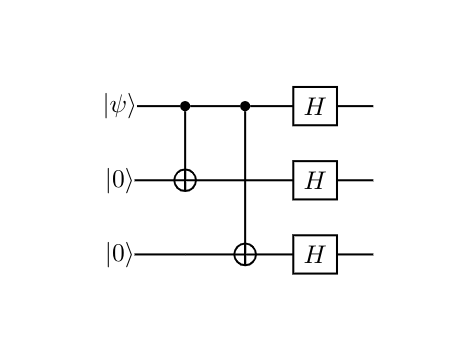

The projection operators used in the error detection and correction procedure are very similar to before, but they are conjugated by Hadamard gates:

\begin{align}
P_0' &= H^{\otimes 3}P_0H^{\otimes 3} \\
P_1' &= H^{\otimes 3}P_1H^{\otimes 3} \\
P_2' &= H^{\otimes 3}P_2H^{\otimes 3} \\
P_3' &= H^{\otimes 3}P_3H^{\otimes 3}
\end{align}

So, for example, let's compute the projection operator $P_1'$. First, compute the tensor product of three Hadamard gates:

\begin{align}
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \otimes
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} \otimes 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} = 
\left( \frac{1}{\sqrt{2}}\right)^3
\begin{pmatrix}
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & -1 & 1 & -1 & 1 & -1 & 1 & -1 \\
1 & 1  & -1 & -1 & 1 & 1 & -1 & -1 \\
1 & -1 & -1 & 1 & 1 & -1 & -1 &  1 \\
1 & 1 & 1 & 1 & -1 & -1 & -1 & -1 \\
1 & -1 & 1 & -1 & -1 & 1 & -1 & 1 \\
1 & 1 & -1 & -1 & -1 & -1 & 1 & 1 \\
1 & -1 & -1 & 1 & -1 & 1 & 1 & -1 
\end{pmatrix}
\end{align}

In [ ]:
H = np.matrix([[1,  1],
               [1, -1]])/np.sqrt(2)

HHH = np.kron(H, np.kron(H,H))

print(HHH)

[[ 0.35355339  0.35355339  0.35355339  0.35355339  0.35355339  0.35355339
   0.35355339  0.35355339]
 [ 0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339 -0.35355339
   0.35355339 -0.35355339]
 [ 0.35355339  0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339
  -0.35355339 -0.35355339]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339 -0.35355339
  -0.35355339  0.35355339]
 [ 0.35355339  0.35355339  0.35355339  0.35355339 -0.35355339 -0.35355339
  -0.35355339 -0.35355339]
 [ 0.35355339 -0.35355339  0.35355339 -0.35355339 -0.35355339  0.35355339
  -0.35355339  0.35355339]
 [ 0.35355339  0.35355339 -0.35355339 -0.35355339 -0.35355339 -0.35355339
   0.35355339  0.35355339]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339 -0.35355339  0.35355339
   0.35355339 -0.35355339]]


Now, compute the conjugate operator $P_1' = H^{\otimes 3}P_1H^{\otimes 3}$:

In [ ]:
M1 = HHH*P1*HHH
print(M1)

[[ 2.50000000e-01 -5.90395006e-18  5.90395006e-18 -2.50000000e-01
   5.90395006e-18 -2.50000000e-01  2.50000000e-01 -5.90395006e-18]
 [-5.90395006e-18  2.50000000e-01 -2.50000000e-01  5.90395006e-18
  -2.50000000e-01  5.90395006e-18 -5.90395006e-18  2.50000000e-01]
 [ 5.90395006e-18 -2.50000000e-01  2.50000000e-01 -5.90395006e-18
   2.50000000e-01 -5.90395006e-18  5.90395006e-18 -2.50000000e-01]
 [-2.50000000e-01  5.90395006e-18 -5.90395006e-18  2.50000000e-01
  -5.90395006e-18  2.50000000e-01 -2.50000000e-01  5.90395006e-18]
 [ 5.90395006e-18 -2.50000000e-01  2.50000000e-01 -5.90395006e-18
   2.50000000e-01 -5.90395006e-18  5.90395006e-18 -2.50000000e-01]
 [-2.50000000e-01  5.90395006e-18 -5.90395006e-18  2.50000000e-01
  -5.90395006e-18  2.50000000e-01 -2.50000000e-01  5.90395006e-18]
 [ 2.50000000e-01 -5.90395006e-18  5.90395006e-18 -2.50000000e-01
   5.90395006e-18 -2.50000000e-01  2.50000000e-01 -5.90395006e-18]
 [-5.90395006e-18  2.50000000e-01 -2.50000000e-01  5.90395006e-18
  -

Now, if we want to perform the same error correction as before, we will need the eight basis states corresponding to the phase flips that can occur to $|0_L\rangle = |lll\rangle$ and $|1_L\rangle = |rrr\rangle$. Start by defining a state 

\begin{align}
\frac{1}{\sqrt{2}}(|0_L\rangle + |1_L\rangle)
\end{align}

In [ ]:
# Define the basis states |l> and |r>
l = (d+u)/np.sqrt(2)
r = (d-u)/np.sqrt(2)

# Define the basis states on three qubits for phase flips
rrr = np.kron(r, np.kron(r,r))
rrl = np.kron(r, np.kron(r,l))
rlr = np.kron(r, np.kron(l,r))
lrr = np.kron(l, np.kron(r,r))
lll = np.kron(l, np.kron(l,l))
llr = np.kron(l, np.kron(l,r))
lrl = np.kron(l, np.kron(r,l))
rll = np.kron(r, np.kron(l,l))

Now, suppose we have a phase flip in the noise channel that produces the corrupt state 

\begin{align}
\frac{1}{\sqrt{2}}|llr\rangle + \frac{1}{\sqrt{2}}|rrl\rangle 
\end{align}

on the first qubit. Then we can use the projection operator $P_1' = H^{\otimes 3}P_0H^{\otimes 3}$ to detect this:

In [ ]:
# Define an error on first qubit corrupted state
psi1 = (llr + rrl)/np.sqrt(2)
print((psi1.H)*M1*(psi1))

[[1.]]


If we apply this to any of the other phase flip errors, we should get zero:

In [ ]:
# Define the other three possible phase flip errors:
psi0 = (rrr + lll)/np.sqrt(2) # no error
psi2 = (rlr + lrl)/np.sqrt(2) # error on second qubit
psi3 = (lrr + rll)/np.sqrt(2) # error on third qubit

# Compute the measurements
print((psi0.H)*M1*(psi0))
print((psi2.H)*M1*(psi2))
print((psi3.H)*M1*(psi3))

[[0.]]
[[0.]]
[[0.]]


## The Shor Code

As we have already discussed, it is possible to encode the information of a single qubit into several qubits, effectively spreading the information out over a highly entangled system of qubits. The mathemtician Peter Shor discovered how to do this by encoding the information of a single qubit into a highly entangled system of nine qubits. This circumvents the issue of no-cloning, and also provides a good example of a quantum error correcting code that corrects *arbitrary* single qubit errors. The Shor code is a combination of the bit-flip and phase-flip codes. First, we encode 

\begin{align}
|0\rangle \mapsto |lll\rangle, \quad |1\rangle \mapsto |rrr\rangle 
\end{align}

where 

\begin{align}
|l\rangle &= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
|r\rangle &= \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
\end{align}

and $|lll\rangle = |l\rangle \otimes |l\rangle \otimes |l\rangle$ and $|rrr\rangle = |r\rangle \otimes |r\rangle \otimes |r\rangle$ as usual. Let's compute this in Python code:

In [ ]:
# Define the basis states |l> and |r>
l = (d+u)/np.sqrt(2)
r = (d-u)/np.sqrt(2)

# Define the basis states on three qubits for phase flips
lll = np.kron(l, np.kron(l,l))
rrr = np.kron(r, np.kron(r,r))

In [ ]:
print(lll)

[[0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]
 [0.35355339]]


In [ ]:
print(rrr)

[[ 0.35355339]
 [-0.35355339]
 [-0.35355339]
 [ 0.35355339]
 [-0.35355339]
 [ 0.35355339]
 [ 0.35355339]
 [-0.35355339]]


Next, each of these qubits is encoded using the three qubit bit-flip code with 

\begin{align}
|l\rangle \mapsto \frac{|000\rangle + |111\rangle}{\sqrt{2}}
\end{align}

and 

\begin{align}
|r\rangle \mapsto \frac{|000\rangle - |111\rangle}{\sqrt{2}}
\end{align}

The result is a nine-qubit code with codewords:

\begin{align}
|0\rangle \mapsto |0_L\rangle &= \left(\frac{1}{\sqrt{2}}|000\rangle + |111\rangle \right)^{\otimes 3}\\
&= \left(\frac{1}{\sqrt{2}}|000\rangle + |111\rangle \right) \otimes \left(\frac{1}{\sqrt{2}}|000\rangle + |111\rangle \right) \otimes \left(\frac{1}{\sqrt{2}}|000\rangle + |111\rangle \right)\\
&= \frac{1}{2\sqrt{2}}(|000\rangle + |111\rangle) \otimes (|000\rangle + |111\rangle) \otimes (|000\rangle + |111\rangle)
\end{align}

and

\begin{align}
|0\rangle \mapsto |0_L\rangle &= \left(\frac{1}{\sqrt{2}}|000\rangle - |111\rangle \right)^{\otimes 3}\\
&= \left(\frac{1}{\sqrt{2}}|000\rangle - |111\rangle \right) \otimes \left(\frac{1}{\sqrt{2}}|000\rangle - |111\rangle \right) \otimes \left(\frac{1}{\sqrt{2}}|000\rangle - |111\rangle \right)\\
&= \frac{1}{2\sqrt{2}}(|000\rangle - |111\rangle) \otimes (|000\rangle - |111\rangle) \otimes (|000\rangle - |111\rangle)
\end{align}

The encoding circuit for the Shor code is:

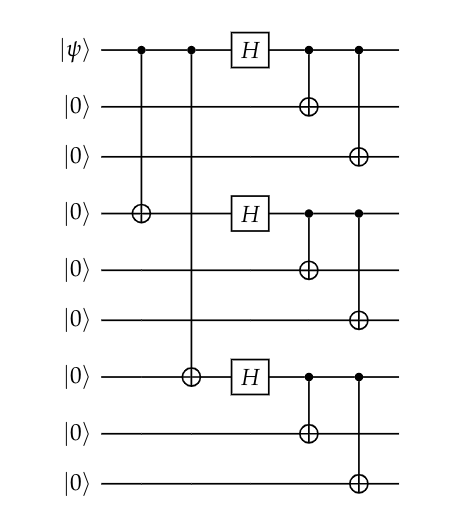

Representing this circuit diagram in a slightly different way makes it more clear that the Shor code is in fact the composite code give by composing the bit-flip and phase-flip codes on three qubits. 

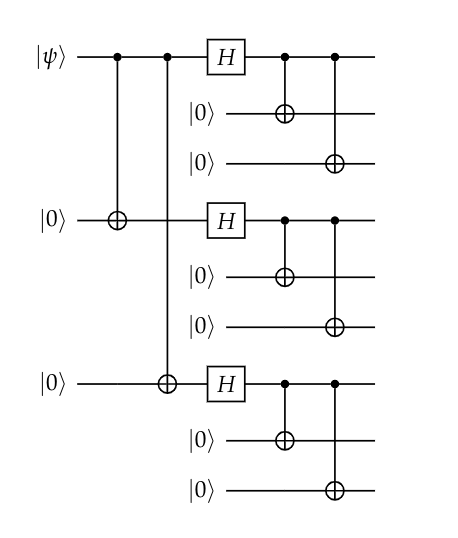

## Stabilizer Codes

Stabilizer codes are a formalism for error correction which are more oriented towards operators than qubit sates. The basic idea is to find invariant vector spaces relaive to a certain list of operators that are spanned by certain qubit state vectors. This puts stabilizer codes, and more generally, graph states and surface codes, into the realm of mathematics known as **invariant theory**. *Invariant theory* is an area of mathematics that studies operators, such as matrices and more general "*linear operators*", by looking at their action on vector spaces. A matrix can act on a vector space in many ways, but generally one studies how matrices act on vectors by multiplication or conjugation. If a certain subset of the vector space is *stabilized* it is often called an invariant subspace with respect to that matrix. There are mathematical structures called *groups*, which are just a special collection of matrices with certain formal properties. Groups are a fundamental object of study in mathematics. One of the most important groups of matrices in quantum computing are the **Pauli groups**. The most basic Pauli group is:

\begin{align}
G_1 = \{\pm I, \pm X, \pm Y, \pm Z, \pm iI, \pm iX, \pm iY, \pm iZ\}
\end{align}

So, this is the collection of Pauli operators, but we are allowed to multiply them by $\pm 1$ and $\pm i$. We are also allowed to multiply these matrices by each other. Something you should prove is that no matter how you multiply any two of the matrices in the Pauli group $G_1$, you will always get another matrix from the group $G_1$. Try picking any two of the matrices in $G_1$, and multiply them together. See what you get. As an example, let's compute the following multiplication by hand, and then in Python:

\begin{align}
(iX)(-Y) &= 
\begin{pmatrix}
0 & i \\
i & 0
\end{pmatrix}
\begin{pmatrix}
0 & i \\
-i & 0
\end{pmatrix}\\
&= 
\begin{pmatrix}
0 & i \\
i & 0
\end{pmatrix}
\begin{pmatrix}
0 \\ -i
\end{pmatrix} + 
\begin{pmatrix}
0 & i \\
i & 0
\end{pmatrix}
\begin{pmatrix}
i \\ 0
\end{pmatrix}\\
&= 
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \\
&= Z
\end{align}

In Python code, we can verify this:

In [ ]:
X = np.matrix([[0, 1],
               [1, 0]])

Y = np.matrix([[0, -1j], 
               [1j, 0]])

print((1j*X)*(-Y))

[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


The Pauli group $G_1$ only acts on a single qubit state vector
\begin{align}
|\psi \rangle = 
\begin{pmatrix}
\alpha \\ \beta
\end{pmatrix}
\end{align}

However, there are more general Pauli groups $G_n$ which are given by tensor products of the matrices in $G_1$. So, for example, $G_2$ would be:

\begin{align}
G_2 &= \{\pm I, \pm X, \pm Y, \pm Z, \pm iI, \pm iX, \pm iY, \pm iZ\}^{\otimes 2} \\
= \{\pm 1, \pm i\} \times &\{I \otimes I, I \otimes X, I \otimes Y, I \otimes Z, X \otimes I, X \otimes X, X \otimes Y, X \otimes Z\\
& Y \otimes I, Y \otimes X, Y \otimes Y, Y \otimes Z, Z \otimes I, Z \otimes X, Z \otimes Y, Z \otimes Z \}
\end{align}

The above notation is from set theory and is meant to indicate that we can multiply any of the matrices in the list by $\pm 1$ or $\pm i$. So, $G_2$ is given by tensor products of two matrices from $G_1$. Similarly, $G_3$ is given by tensor products of any three matrices from $G_1$. In general, $G_n$ is given by tensor products of $n$-matrices from $G_1$. These all form a mathematical structure called a **group**. To be a group means:

1. Multiplying any two matrices in $G_n$ always gives another matrix in $G_n$. 
2. There is an **"identity operator"**, given by $I^{\otimes n} = I \otimes I \otimes \cdots \otimes I$. 
3. Every matrix in $G_n$ has an **inverse**, meaning if we multiply a matrix and its (unique) inverse, we get the identity operator. 

Now, the formalities of group theory are not terribly important at the moment, but it is important to know that groups are a heavily studied structure in mathematics. They show up everywhere. They show up in physics just as often, and you wouldn't be wasting your time if you developed an interest in group theory. Groups are useful. Now, suppose we have some sub-collection of matrices from one of the Pauli groups $G_n$. Let's call our sub-collection $S$. Next, assume that $S$ also satisfies the three properties above for a group. Then we call $S$ a **subgroup** of $G_n$. $S$ will *act on* state vectors describing the state of $n$-qubits. The collection of all state vectors describing $n$-qubit states is a **vector space**, let's call it $\mathbb{H}^n = (\mathbb{C}^2)^{\otimes n}$. This is just all vectors given by the tensor product of three state vectors for three different qubits. If we let the group $S$ act on $\mathbb{H}^n$, there will be some state vectors which are *stabilized* or *left unchanged* by the matrices in $S$. These vectors must of course be fixed or left unchanged by every matrix in $S$, and if they are we call such a vector space the *"vector space stabilized by $S$"*, and we will label if by $V_S$. We also call $S$ the *stabilizer* of $V_S$. Let's look at an example. Let $S$ be the subgroup of $G_3$ given by 

\begin{align}
S &= \{I^{\otimes 3}, Z \otimes Z \otimes I, Z \otimes I \otimes Z, I \otimes Z \otimes Z\}\\
&= \{III, ZZI, ZIZ, IZZ\}
\end{align}

The second notation is a shorthand we will use so that writing something like $ZZI$ becomes much shorter and easier that writing $Z \otimes Z \otimes I$. This is a very common notation in quantum computing, especially in the context of stabilizer codes and error correction. It should not be confused with matrix multiplication. To prevent confusion, sometimes people add subscripts to the matrices and write things like $Z_1Z_2I_3$ to denote $ZZI$ or $Z \otimes Z \otimes I$. We will generally just write $ZZI$ and hope that there is not confusion. 

Let's look at a few vectors that are stabilized by the operator $ZZI$. 

\begin{align}
ZZI |000\rangle &= 
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \otimes
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix} \otimes
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
\begin{pmatrix}
1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
\end{pmatrix} \\
&= 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 &-1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 &-1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 &-1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 &-1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 
\end{pmatrix}
\begin{pmatrix}
1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
\end{pmatrix} \\
& = 
\begin{pmatrix}
1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0
\end{pmatrix}\\
&= |000\rangle
\end{align}

We can see that $ZZI|000\rangle = |000\rangle$. We can verify this with a little Python code:

## Stabilizer Version of the Shor Code

The eight generators for the stabilizer nine-qubit Shor code, along with the logical Z and logical X operators are given as follows:

\begin{align}
g_1 &= ZZIIIIIII \\
g_2 &= IZZIIIIII \\
g_3 &= IIIZZIIII \\
g_4 &= IIIIZZIII \\
g_5 &= IIIIIIZZI \\
g_6 &= IIIIIIIZZ \\
g_7 &= XXXXXXIII \\
g_8 &= IIIXXXXXX \\
(\text{logical}\ X)\ \overline{Z} &= XXXXXXXXX \\
(\text{logical}\ Z)\ \overline{X} &= ZZZZZZZZZ
\end{align}

To verify that these indeed stabilize the Shor code, let's create the circuit for the Shor code in QISKit. 

In [ ]:
from qiskit import *
%matplotlib inline

In [ ]:
qr = QuantumRegister(9)
cr = ClassicalRegister(9)
qc = QuantumCircuit(qr, cr)

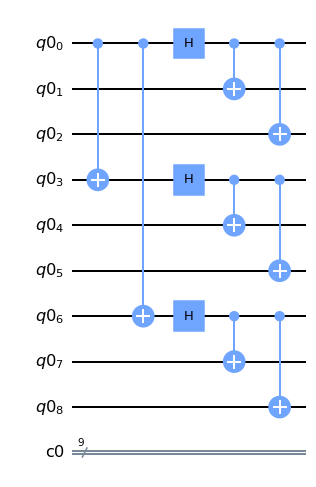

In [ ]:
qc.cx(0,3)
qc.cx(0,6)
qc.h(0)
qc.h(3)
qc.h(6)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(3,4)
qc.cx(3,5)
qc.cx(6,7)
qc.cx(6,8)
qc.draw(output='mpl')

Now, let's print out the state vector.

In [ ]:
from qiskit.visualization import plot_bloch_multivector
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 
# Do the simulation, returning the state vector
out_state = execute(qc,backend).result().get_statevector() 
# Display the output state vector
out_state

array([0.35355339+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.35355339+0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
      

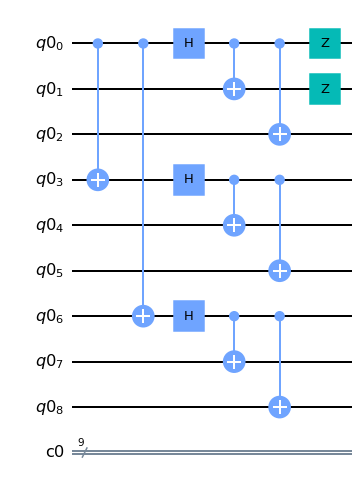

In [ ]:
qc.z(0)
qc.z(1)
qc.draw(output='mpl')

In [ ]:
# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 
# Do the simulation, returning the state vector
out_state_2 = execute(qc,backend).result().get_statevector() 
# Display the output state vector

In [ ]:
out_state == out_state_2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

This clearly shows that the first stabilizer generator in the table indeed preserves the state vector of the circuit. 